In [203]:
#Import all the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# Data Exploration

In [204]:
# Read 'Data.csv' into a DataFrame named data
data = pd.read_csv('C:/Users/sabih/OneDrive/Desktop/OnlineRetail.csv', encoding = 'unicode_escape' )

#(A parameter unicode_escape has been used to avoid any error that might have occured due to certaininvalid character)


# Examine the head of the DataFrame
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [205]:
# Check the top ten countries in the dataset with highest transactions
data.Country.value_counts(normalize=True).head(10).mul(100).round(1).astype(str) + '%'

United Kingdom    91.4%
Germany            1.8%
France             1.6%
EIRE               1.5%
Spain              0.5%
Netherlands        0.4%
Belgium            0.4%
Switzerland        0.4%
Portugal           0.3%
Australia          0.2%
Name: Country, dtype: object

#### 90% of records belong to the sales are from United Kingdom 

In [206]:
# Examine the shape of the DataFrame
print(data.shape)

(541909, 8)


In [207]:
# Print the data types of dataset
print(data.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


##### Since we see repitation in the country column as each customer ID and description has been linked to their respective country hence we will call out customer distribution in terms of country 

In [208]:
# Dropping the duplicate values
country_data=data[['Country','CustomerID']].drop_duplicates()

#Customer count in respect to their specific country
country_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


#### Since we have a large majority of data from UK hence we will focus on the UK data and drop the remaining countries data

In [209]:
#Customers only from United Kingdom
data = data.query("Country=='United Kingdom'").reset_index(drop=True)

#Check for missing values in the dataset
data.isnull().sum(axis=0)

print(data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
495473    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
495474    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
495475    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
495476    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
495477    581586     20685                DOORMAT RED RETROSPOT        10   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [210]:
#Removing the missing values from CustomerID column
data = data[pd.notnull(data['CustomerID'])]


#Checking whether the Quantity column has a negative value in it
data.Quantity.min()

-80995

In [211]:
data.UnitPrice.min()

0.0

In [212]:
#Checking whether the Quantity column has a negative value in it
data=data[(data['Quantity']>0) & (data['UnitPrice']>0)]
data.describe() 

,Quantity,UnitPrice,CustomerID
count,354321.000000,354321.000000,354321.000000
mean,12.013795,2.963994,15552.486392
std,189.267956,17.862655,1594.527150
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [213]:
# Print the data types of dataset
print(data.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [214]:
#Convert the InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [215]:
#Adding a total Sales column in the data set 
data['Total_Sales'] = data['Quantity'] * data['UnitPrice']
data.shape

(354321, 9)

In [216]:
# Now the overall data set looks somethng like this
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [217]:
import datetime as dt

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.month


In [218]:
# Express Monthly Sales
monthly_sales = data[['Month', 'Quantity']].groupby('Month').sum()
monthly_sales

,Quantity
Month,
1,278251
2,213375
3,276304
4,260448
5,301824
6,280974
7,303601
8,310831
9,454559


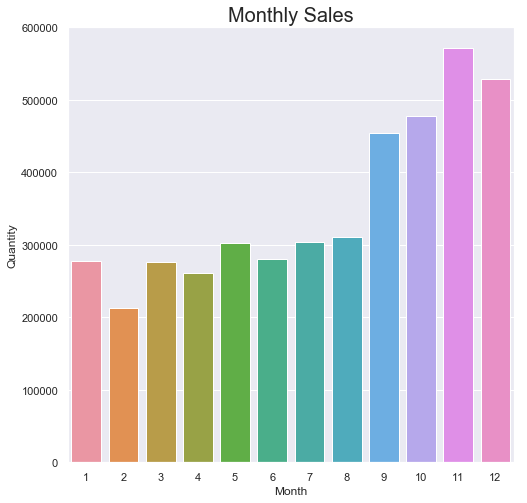

In [219]:
# Bar plot
plt.figure(figsize=(8,8))
plt.title("Monthly Sales", fontsize=20)
sns.barplot(monthly_sales.index, monthly_sales['Quantity'])

#### Majority of Sales occur in betwene the month of September and December Saint Nicholas Day (Christian) ,Fiesta of Our Lady of Guadalupe (Mexican), St. Lucia Day (Swedish), Hanukkah (Jewish), Christmas Day (Christian), Three Kings Day/Epiphany (Christian)



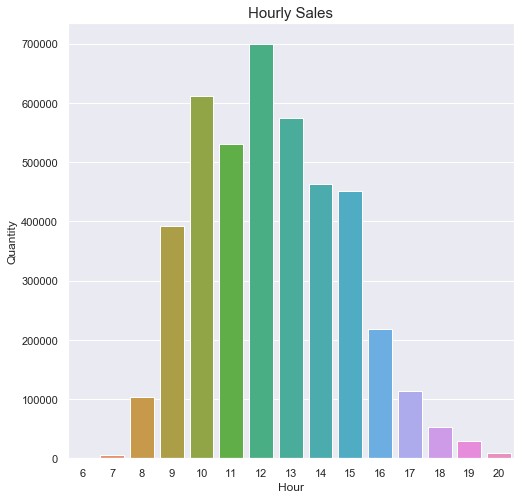

In [220]:
data['Hour'] = data['InvoiceDate'].dt.hour
hourly_sales = data[['Hour', 'Quantity']].groupby('Hour').sum()

# Bar plot
plt.figure(figsize=(8,8))
plt.title("Hourly Sales", fontsize=15)
sns.barplot(hourly_sales.index, hourly_sales['Quantity'])

#### A large amonut of the sales occurs in between 10am to 3pm

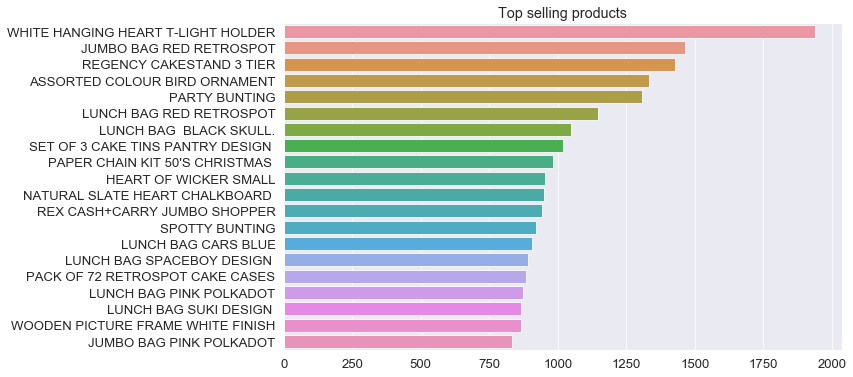

In [221]:
# Visualizing the top selling products

top_products = data['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top selling products")
plt.show();

# RFM Modeling

#### Behavioral customer segmnetation based on three metrics RECENCY, FREQUENCY & MONETARY VALUE

In [222]:
# For recency will check what was the last date of transaction
#First will convert the InvoiceDate as date variable
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [223]:
#RFM factors calculation:
Latest_date = dt.datetime(2011,12,10)
RFM_data = data.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Latest_date - x.max()).days, 'InvoiceNo' : 'count','Total_Sales' : 'sum'}).reset_index()

#converting the names of the columns
RFM_data.rename(columns = {'InvoiceDate' : 'Recency',
                          'InvoiceNo' : "Frequency",
                          'Total_Sales' : "Monetary"},inplace = True)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4595,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [224]:
# Summarized RFM table
RFM_data.iloc[:,1:4].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,300.280000
50%,50.000000,41.000000,652.280000
75%,142.000000,99.250000,1576.585000
max,373.000000,7847.000000,259657.300000


#### We observe from the above results that  average recency of the customers is almost 92 days, an average customer purchases a product 90 times and spending an average of 1863.91 unitprice.

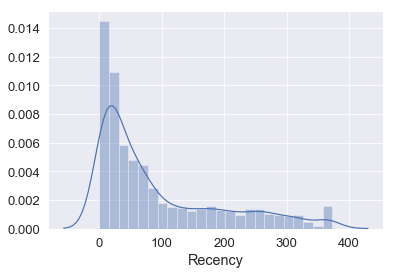

In [225]:
#Recency distribution plot
x = RFM_data['Recency']
ax = sns.distplot(x)

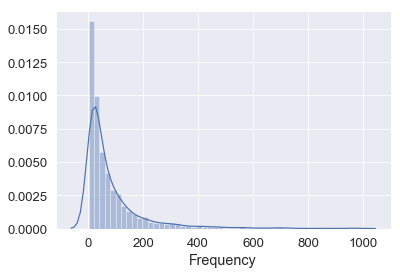

In [226]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = RFM_data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(x)

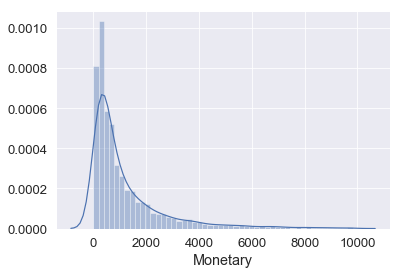

In [227]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x = RFM_data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(x)

# Customer Segmentation

#### Market segmentation is the activity of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers based on some type of shared characteristics

In [228]:
quantiles = RFM_data.drop('CustomerID',axis = 1).quantile(q = [0.25,0.5,0.75])
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'Monetary': {0.25: 300.28000000000003,
  0.5: 652.2800000000002,
  0.75: 1576.5850000000005}}

In [229]:
#Creating table with R,F and M scoring
#Recency scoring 
def R_score(var,p,d):
    if var <= d[p][0.25]:
        return 1
    elif var <= d[p][0.50]:
        return 2
    elif var <= d[p][0.75]:
        return 3
    else:
        return 4
#Frequency and Monetary 
def FM_score(var,p,d):
    if var <= d[p][0.25]:
        return 4
    elif var <= d[p][0.50]:
        return 3
    elif var <= d[p][0.75]:
        return 2
    else:
        return 1

#Scoring:
RFM_data['R_score'] = RFM_data['Recency'].apply(R_score,args = ('Recency',quantiles,))
RFM_data['F_score'] = RFM_data['Frequency'].apply(FM_score,args = ('Frequency',quantiles,))
RFM_data['M_score'] = RFM_data['Monetary'].apply(FM_score,args = ('Monetary',quantiles,))
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4595,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


In [230]:
#Now we will create : RFMGroup and RFMScore
RFM_data['RFM_Group'] = RFM_data['R_score'].astype(str) + RFM_data['F_score'].astype(str) + RFM_data['M_score'].astype(str)

#Score
RFM_data['RFM_Score'] = RFM_data[['R_score','F_score','M_score']].sum(axis = 1)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4595,33719.73,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5


In [231]:
#Customer segmnetation
Customer_loyality = ['Tier_1','Tier_2','Tier_3','Tier_4']
C = pd.qcut(RFM_data['RFM_Score'],q = 4,labels=Customer_loyality)
RFM_data['RFM_Customer_loyality'] = C.values
RFM_data.tail(15)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Customer_loyality
3905,18265.0,72,46,801.51,3,2,2,322,7,Tier_2
3906,18268.0,134,1,25.50,3,4,4,344,11,Tier_4
3907,18269.0,366,7,168.60,4,4,4,444,12,Tier_4
3908,18270.0,38,11,283.15,2,4,4,244,10,Tier_3
3909,18272.0,2,166,3078.58,1,1,1,111,3,Tier_1
3910,18273.0,2,3,204.00,1,4,4,144,9,Tier_3
3911,18274.0,30,11,175.92,2,4,4,244,10,Tier_3
3912,18276.0,43,14,335.86,2,4,3,243,9,Tier_3
3913,18277.0,58,8,110.38,3,4,4,344,11,Tier_4
3914,18278.0,73,9,173.90,3,4,4,344,11,Tier_4
